## Observations and Insights 

•	The first thing I noticed was that Propriva was used the least amount. Capomulin was most used with Ramicane as a close second. It’s also wise to note that both Capomulin and Ramicane had the lowest SEM numbers out of all 10 Drug Regimens provided on the dataset. 

•	The Tumor volume was increased in Caftamin & Infubinol, with Infubinol having the biggest tumor volume. One could assume that Infubinol was the least effective out of the 4 drug regimens pulled.  

•	At first glance, one would assume that the increased weighted mice would have a bigger tumor volume. Apon looking at the 45mm3 Volume group, it seems that there are several mice that around between 22g – 25g. Though the bigger volume mice did have a bigger weight, which is to be expected. Roughly around 45mm3 Tumor Volume, you start seeing the majority of the increased weight in the mice. 

•	It would be interesting to do a follow up, if the tumors had to be removed, and see if there was any correlation between the weight gain and tumor weight. To see how the body was responding (hormone wise) to the invader and gained weight that wasn’t the tumors weight. Most cancers (in humans) report a weight loss whereas in this study, the mice are gaining weight, most likely due to the size of the tumor.  


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results & drop duplicates
mouse_metadata = pd.read_csv(mouse_metadata_path).drop_duplicates()
study_results = pd.read_csv(study_results_path).drop_duplicates()

# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='right')

# Display the data table for preview
merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1887,z969,Naftisol,Male,9,30,25,63.145652,2
1888,z969,Naftisol,Male,9,30,30,65.841013,3
1889,z969,Naftisol,Male,9,30,35,69.176246,4
1890,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
num_mice = merged_data['Mouse ID']
mice = len(num_mice)
mice

1892

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_data.loc[merged_data.duplicated(subset=["Mouse ID", "Timepoint",]),"Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
dup_data = merged_data['Mouse ID'] == 'g989'

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_duplicate_data = merged_data[dup_data]
mouse_duplicate_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,5,48.786801,0
910,g989,Propriva,Female,21,26,5,47.570392,0
911,g989,Propriva,Female,21,26,10,51.745156,0
912,g989,Propriva,Female,21,26,10,49.880528,0


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=merged_data[merged_data["Mouse ID"].isin(duplicate_mice) == False]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1887,z969,Naftisol,Male,9,30,25,63.145652,2
1888,z969,Naftisol,Male,9,30,30,65.841013,3
1889,z969,Naftisol,Male,9,30,35,69.176246,4
1890,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_df['Mouse ID'].value_counts()
Cmice = len(clean_mice)
Cmice

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
tumor_regimen = clean_df.groupby(['Drug Regimen'])
tumor_regimen

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_mean = tumor_regimen["Tumor Volume (mm3)"].mean()
tumor_median = tumor_regimen["Tumor Volume (mm3)"].median()
tumor_variance = tumor_regimen["Tumor Volume (mm3)"].var()
tumor_stddev = tumor_regimen["Tumor Volume (mm3)"].std()
tumor_SEM = tumor_regimen["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
tumor_sum = pd.DataFrame({"Mean": tumor_mean,
                         "Median": tumor_median,
                         "Variance": tumor_variance,
                         "Std Deviation": tumor_stddev,
                         "SEM": tumor_SEM})
tumor_sum


,Mean,Median,Variance,Std Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
tumor_agg = tumor_regimen["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
tumor_agg.columns = ["Mean", "Median", "Variance", "Std Deviation", "SEM"]
tumor_agg


,Mean,Median,Variance,Std Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

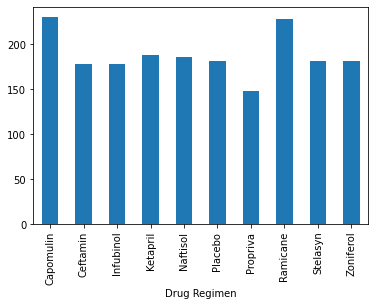

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
clean_df.groupby(['Drug Regimen'])["Timepoint"].count().plot(kind = "bar");

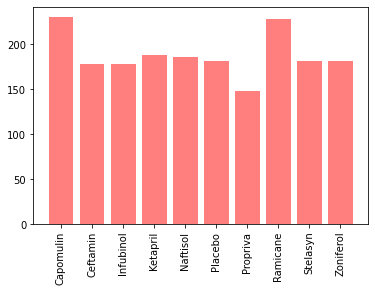

In [20]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timepoints_pyplot = clean_df.groupby(['Drug Regimen'])["Timepoint"].count()

plt.bar(timepoints_pyplot.index, timepoints_pyplot.values, color='r', alpha=0.5, align="center")
plt.xticks(rotation = "vertical");

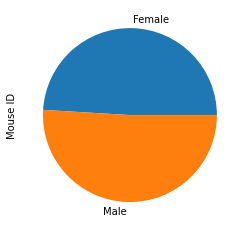

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
clean_df.groupby(['Sex'])["Mouse ID"].count().plot(kind = "pie");

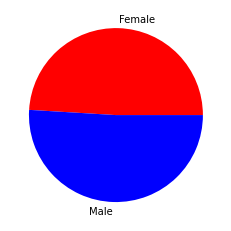

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
timepoints_pyplot = clean_df.groupby(['Sex'])["Mouse ID"].count()


plt.pie(timepoints_pyplot.values, labels=timepoints_pyplot.index, colors=["red","blue"]);


## Quartiles, Outliers and Boxplots

In [30]:
# # # Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# # # Capomulin, Ramicane, Infubinol, and Ceftamin
filtered_df = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin") |
                           (clean_df["Drug Regimen"] == "Ramicane") |
                           (clean_df["Drug Regimen"] == "Ceftamin") |
                           (clean_df["Drug Regimen"] == "Infubinol"), :]

final_tumor_vol = filtered_df.groupby(["Mouse ID"])
final_tumor_vol["Timepoint"].max()

# # # Start by getting the last (greatest) timepoint for each mouse
final_tumor_vol_df = final_tumor_vol["Timepoint"].max().to_frame()
final_tumor_vol_df

# # # Merge this group df with the original dataframe to get the tumor volume at the last timepoint

final_tumor_vol_df = final_tumor_vol_df.merge(filtered_df, right_on= "Mouse ID", left_on="Mouse ID", suffixes= ("_max",None))
final_tumor_vol_df

final_tumor_vol_df = final_tumor_vol_df[final_tumor_vol_df["Timepoint_max"]==final_tumor_vol_df["Timepoint"]]

In [44]:
regimens = ["Capomulin", "Ramicane", "Ceftamin", "Infubinol"]
tumor_vol = [] 
final_tum_grouped = final_tumor_vol_df.groupby('Drug Regimen')

for regimen in regimens:
    #Group Regimen and Tumor Volume into a series 
    tumor_volume_series = final_tum_grouped.get_group(regimen)['Tumor Volume (mm3)']
    tumor_volume_values = tumor_volume_series.sort_values()
    tumor_vol.append(tumor_volume_values)
    
    # Determine quartiles
    quartiles = tumor_volume_series.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    # Determine upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    # Print a filtered dataframe of any outliers
    outliers_df = tumor_volume_series[(tumor_volume_series > upper_bound) | (tumor_volume_series < lower_bound)].to_frame()
    display(outliers_df)

,Tumor Volume (mm3)


,Tumor Volume (mm3)


,Tumor Volume (mm3)


,Tumor Volume (mm3)
132,36.321346


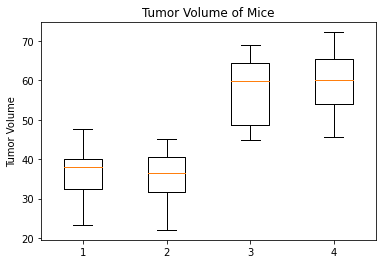

In [45]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest & remove outliers 
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume of Mice')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(tumor_vol, showfliers=False);

## Line and Scatter Plots

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


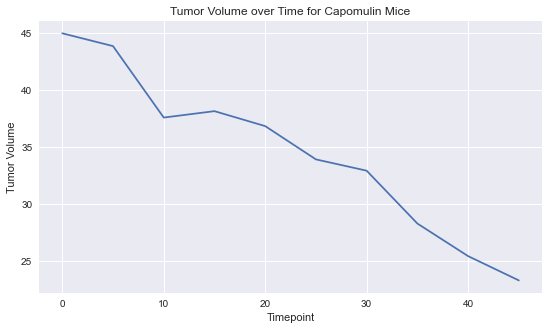

In [56]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#Set a new theme
plt.style.use('seaborn')

#Single mouse treated with Capomulin 
mouse_id = clean_df[clean_df['Drug Regimen']== 'Capomulin'].iloc[0]['Mouse ID']
mouse_df = clean_df[clean_df['Mouse ID']==mouse_id]
display(mouse_df)

#Create x & y values for plotting
x_values = mouse_df['Timepoint']
y_values = mouse_df['Tumor Volume (mm3)']

# Plot the tumor volume for various mice
fig, ax = plt.subplots(figsize = (9,5))
plt.plot(x_values, y_values)


# Show the chart, add labels
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.title('Tumor Volume over Time for Capomulin Mice')
plt.show() 


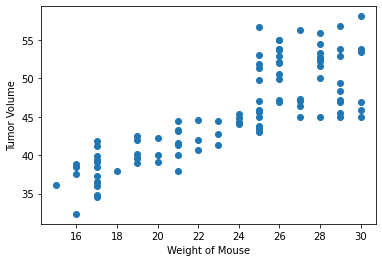

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mouse_weight = final_tumor_vol_df.groupby(final_tumor_vol_df["Mouse ID"])["Weight (g)"].mean()
tumor_volume = final_tumor_vol_df.groupby(final_tumor_vol_df["Mouse ID"])["Tumor Volume (mm3)"].mean()

# Create Scatter Plot with values calculated above
plt.scatter(mouse_weight,tumor_volume)
plt.xlabel("Weight of Mouse")
plt.ylabel("Tumor Volume")
plt.show()

## Correlation and Regression

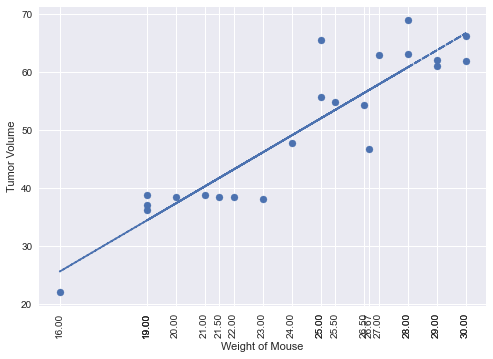

The correlation between weight and tumor value is 0.92


In [58]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
capomulin_df = clean_df[clean_df["Drug Regimen"]== 'Capomulin']

mouse_weight = final_tumor_vol_df.groupby(capomulin_df["Mouse ID"])["Weight (g)"].mean()
tumor_volume = final_tumor_vol_df.groupby(capomulin_df["Mouse ID"])["Tumor Volume (mm3)"].mean()

# Perform a linear regression on year versus violent crime rate
slope, int, r, p, std_err = st.linregress(mouse_weight, tumor_volume)
      
# Create equation of line to calculate predicted violent crime rate
fit = slope * mouse_weight + int

# Plot the linear model on top of scatter plot 
plt.scatter(mouse_weight,tumor_volume)
plt.xlabel("Weight of Mouse")
plt.ylabel("Tumor Volume")
plt.plot(mouse_weight,fit,"--")
plt.xticks(mouse_weight, rotation=90)
plt.show()

# Caculate correlation coefficient
corr = round(st.pearsonr(mouse_weight,tumor_volume)[0],2)
print(f'The correlation between weight and tumor value is {corr}')